In [234]:
import os, math, subprocess
import datetime as dt

#data wrangling
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#excel library
import xlrd
import re

In [235]:
#Loading data
df_newcustomerlist = pd.read_excel('KPMG.xlsx', sheet_name= 'NewCustomerList')
df_newcustomerlist.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.87,1.0875,1.359375,1.155469,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.76,0.7600,0.950000,0.807500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.03,1.0300,1.030000,1.030000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.83,1.0375,1.037500,1.037500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.73,0.7300,0.912500,0.912500,4,4,1.703125


In [236]:
df_newcustomerlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

# CHECK MISSING DATA

In [237]:
#check sum of missing data
df_newcustomerlist.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

# CHECK DUPLICATION

In [238]:
#Check dupplication in dataframe
df_newcustomerlist.duplicated().sum()


0

   # CHECK & MODIFY EACH COLUMN
     1. first_name, last_name, gender

In [239]:
df_newcustomerlist['first_name'].duplicated().sum()

60

In [240]:
df_newcustomerlist['last_name'].duplicated().sum()

38

In [241]:
#Check dupplicate if customers have same first name and last name
df_newcustomerlist.duplicated(subset=['first_name','last_name']).sum()

0

In [242]:
#Check the variables of Gender
df_newcustomerlist['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [243]:
#There are 17 rows of Gender containing 'U'
df_newcustomerlist[df_newcustomerlist['gender']=='U'].count().head(3)

first_name    17
last_name     17
gender        17
dtype: int64

2. past_3_years_bike_related_purchases

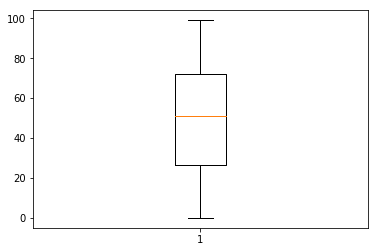

In [244]:
#Check significant outlier of past_3_years_bike_related_purchases
plt.boxplot(df_newcustomerlist['past_3_years_bike_related_purchases'])
plt.show()

In [245]:
#Check min&max of past_3_years_bike_related_purchases
print('min buy: ', df_newcustomerlist['past_3_years_bike_related_purchases'].min())
print('max buy: ', df_newcustomerlist['past_3_years_bike_related_purchases'].max())

min buy:  0
max buy:  99


In [246]:
#count and show rows of past_3_years_bike_related_purchases = 0
df_newcustomerlist[df_newcustomerlist['past_3_years_bike_related_purchases'] == 0]
#There are 9 rows

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
76,Tobias,Woodhams,Male,0,1961-04-15,Research Nurse,Health,Mass Customer,N,No,...,NSW,Australia,9,1.02,1.020,1.275,1.08375,77,77,1.341406
113,Meriel,Tapp,Female,0,1995-08-13,VP Sales,IT,Mass Customer,N,No,...,VIC,Australia,2,0.92,0.920,0.920,0.78200,114,114,1.275000
225,Hersh,Stubbert,Male,0,2000-06-25,Technical Writer,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,8,0.74,0.925,0.925,0.78625,226,226,1.112500
322,Honey,Gosdin,Female,0,1981-11-29,Software Engineer I,Property,Mass Customer,N,No,...,NSW,Australia,9,0.80,0.800,1.000,0.85000,322,322,1.012500
451,Katie,Warhurst,Female,0,1991-12-02,Help Desk Operator,Retail,High Net Worth,N,Yes,...,VIC,Australia,5,0.74,0.925,0.925,0.92500,450,450,0.900000
545,Katy,Crooke,Female,0,1977-06-30,Food Chemist,Health,Mass Customer,N,No,...,NSW,Australia,12,0.72,0.720,0.900,0.76500,546,546,0.823437
798,Cherye,Stanfield,Female,0,1981-07-05,Environmental Tech,Manufacturing,Affluent Customer,N,No,...,NSW,Australia,9,0.50,0.500,0.625,0.62500,797,797,0.600000
904,Roth,Crum,U,0,NaT,Legal Assistant,IT,Mass Customer,N,No,...,NSW,Australia,6,0.60,0.600,0.600,0.51000,904,904,0.500000
960,Sonia,Dunstall,Female,0,1975-07-30,Accountant III,Financial Services,Mass Customer,N,No,...,NSW,Australia,9,1.08,1.080,1.350,1.14750,960,960,0.442000


In [247]:
#Check min, max, count, sum of past_3_years_bike_related_purchases acorrding to job title and job industry category
test5 = df_newcustomerlist.groupby(['job_industry_category'])['past_3_years_bike_related_purchases'].agg(['min', 'max', 'mean', 'median', 'count', 'sum'])
test5 = test5.reset_index()
test5

,job_industry_category,min,max,mean,median,count,sum
0,Argiculture,6,97,50.884615,45.5,26,1323
1,Entertainment,3,95,52.783784,58.0,37,1953
2,Financial Services,0,99,52.039409,54.0,203,10564
3,Health,0,99,48.822368,48.0,152,7421
4,IT,0,99,52.705882,54.0,51,2688
5,Manufacturing,0,99,48.050251,49.0,199,9562
6,Property,0,97,47.390625,50.0,64,3033
7,Retail,0,99,54.166667,57.5,78,4225
8,Telecommunications,7,97,50.000000,51.0,25,1250


3. DOB

In [248]:
#Check DOB
df_check_age = df_newcustomerlist[['first_name', 'gender', 'DOB']].dropna()
df_check_age['DOB'].min()
#Min of DOB containing value of year 1938, it means that the oldest customer would be 81 years old

Timestamp('1938-06-08 00:00:00')

In [249]:
#Range of customer's ages
df_check_age['Year'] = df_check_age['DOB'].dt.strftime('%Y')
df_check_age['Age'] = int(dt.datetime.today().strftime("%Y")) - df_check_age['Year'].astype('int64')
print('min age: ', df_check_age['Age'].min())
print('max age: ', df_check_age['Age'].max())

min age:  17
max age:  81


In [250]:
df_check_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 5 columns):
first_name    983 non-null object
gender        983 non-null object
DOB           983 non-null datetime64[ns]
Year          983 non-null object
Age           983 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.1+ KB


4. Job_tittle and Job_industry_category

In [251]:
#check most frequent title and duplication in Job tittle
df_jobtitle = df_newcustomerlist.dropna(subset=['job_title'])
df_jobtitle['job_title'].value_counts().idxmax()

'Associate Professor'

In [252]:
#Count max of Associate Professor
df_jobtitle['job_title'].value_counts().max()

15

In [253]:
#Check number of job title including dupplication
df_jobtitle['job_title'].count()

894

In [254]:
#Check number of job title excluding dupplication
df_jobtitle.job_title.drop_duplicates().count()
#There are 184 job titles

184

In [255]:
#check dupplicate in Job_industry_category
#Drop na and check most frequent title
df_jobin = df_newcustomerlist.dropna(subset=['job_industry_category'])
df_jobin['job_industry_category'].value_counts().idxmax()

'Financial Services'

In [256]:
#Count max of Financial Services
df_jobin['job_industry_category'].value_counts().max()

203

In [257]:
#Check job category including dupplication
df_jobin['job_industry_category'].count()

835

In [258]:
#Check job category excluding dupplication
df_jobin['job_industry_category'].unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', 'Argiculture'],
      dtype=object)

In [259]:
#Check number of job category excluding dupplication
df_jobin.job_industry_category.drop_duplicates().count()

9

5. Wealth_Segment

In [260]:
#count unique values in wealth_segment
df_newcustomerlist['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [261]:
#count most frequent item in wealth_segment
df_newcustomerlist['wealth_segment'].value_counts().idxmax()

'Mass Customer'

In [262]:
#Count max of Mass Customer
df_newcustomerlist['wealth_segment'].value_counts().max()

508

In [263]:
#Checking illogcal arrangement in wealth_segment
test3 = df_newcustomerlist.groupby(['wealth_segment'])['Value','tenure'].agg(['min', 'max', 'sum'])
test3 = test3.reset_index()
test3
#Max of property value does not fall into High Net Worth of Wealth Segment?
#Max of tenure remains same in all Wealth Segment?
#Mass Customer holds higher total property value and tenure than High Net Worth?

wealth_segment   Value                       tenure          
                         min       max         sum    min max   sum
0  Affluent Customer  0.3570  1.718750  209.497031      0  22  2776
1     High Net Worth  0.3995  1.671875  222.839344      0  22  2940
2      Mass Customer  0.3400  1.718750  449.377719      1  22  5672

6.deceased_indicator

In [264]:
#deceased_indicator
df_newcustomerlist['deceased_indicator'].unique()

array(['N'], dtype=object)

7. owns_car

In [265]:
#owns_car
df_newcustomerlist['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [266]:
df_newcustomerlist['owns_car'].value_counts().idxmax()

'No'

In [267]:
df_newcustomerlist['owns_car'].value_counts().max()

507

8. Tenure

In [268]:
#tenure
#count and show rows of tenure = 0
df_newcustomerlist[df_newcustomerlist['tenure'] == 0][['first_name','last_name','past_3_years_bike_related_purchases','job_title','job_industry_category','wealth_segment','tenure','property_valuation','Rank','Value']]
#There are 2 customers in High Net Worth and Affluent Customer Wealth_segment having 0 tenure, but holding certain property value and ranking, it means illogical.

,first_name,last_name,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,tenure,property_valuation,Rank,Value
664,Chicky,Sinclar,43,Operator,IT,High Net Worth,0,4,662,0.711875
984,Pauline,Dallosso,82,Desktop Support Technician,IT,Affluent Customer,0,10,985,0.408000


9. Address

In [269]:
#Address
df_newcustomerlist.duplicated(subset=['address']).sum()

0

In [270]:
#There is an issue of address starting with 0
sort_address = df_newcustomerlist.sort_values('address')
sort_address['address'].head()

721         0 Bay Drive
138    0 Dexter Parkway
624       0 Emmet Trail
300      0 Esker Avenue
685      0 Express Lane
Name: address, dtype: object

In [271]:
#Fix address number = 0 and modify address number has 0 before it.
#String manipulation in python: https://www.pythonforbeginners.com/basics/string-manipulation-in-python
df_newcustomerlist['address'] = df_newcustomerlist['address'].str.strip("0")
df_newcustomerlist['address'].sort_values().head()

721          Bay Drive
138     Dexter Parkway
624        Emmet Trail
300       Esker Avenue
685       Express Lane
Name: address, dtype: object

In [272]:
#Problems??? postcode and addresses are not match
#There are a few invalid addresses, địa chỉ sai
#df_newcustomerlist[df_newcustomerlist['postcode'] == 4000][['tenure','address','postcode','state','country']]
#Show all cardinal numbers
df_newcustomerlist['address'].head(20)
#Address of Row 17 displays as: 61 4th Street


0          45 Shopko Center
1         14 Mccormick Park
2       5 Colorado Crossing
3        207 Annamark Plaza
4         115 Montana Place
5     89105 Pearson Terrace
6         7 Nevada Crossing
7          85 Carioca Point
8            717 West Drive
9      80 Scofield Junction
10       3682 Crowley Point
11      3 Golden Leaf Point
12         484 North Avenue
13      591 Anzinger Circle
14           39 Kedzie Pass
15        64 Granby Parkway
16       610 Swallow Street
17            61 4th Street
18         1550 Russell Way
19          193 North Point
Name: address, dtype: object

In [273]:
#Fixxing Address by converting ordinal to cardinal number
df_newcustomerlist.address = df_newcustomerlist.address.str.replace(r"(\d+)(st|nd|rd|th)\b", r"\1")
df_newcustomerlist.address = df_newcustomerlist.address.str.replace(r'(\d)\s+(\d)', r'\1\2')
df_newcustomerlist.address.head(20)

0          45 Shopko Center
1         14 Mccormick Park
2       5 Colorado Crossing
3        207 Annamark Plaza
4         115 Montana Place
5     89105 Pearson Terrace
6         7 Nevada Crossing
7          85 Carioca Point
8            717 West Drive
9      80 Scofield Junction
10       3682 Crowley Point
11      3 Golden Leaf Point
12         484 North Avenue
13      591 Anzinger Circle
14           39 Kedzie Pass
15        64 Granby Parkway
16       610 Swallow Street
17               614 Street
18         1550 Russell Way
19          193 North Point
Name: address, dtype: object

In [274]:
#Convert Cardinal number to Ordinal number
#inflect.py - Correctly generate plurals, singular nouns, ordinals, indefinite articles; convert numbers to words.
#Sample code: https://inflection.readthedocs.io/en/latest/

10. Postcode & State

In [275]:
df_newcustomerlist['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [276]:
#Count số lần của postcode xuất hiện trong 1 bang
count = df_newcustomerlist.groupby(['state', 'postcode'],as_index=False)[['first_name']].count()
count = count.set_axis(['state', 'postcode', 'count'], axis=1, inplace=False)
count.sort_values(by='count',ascending=False).head()

,state,postcode,count
128,NSW,2232,9
76,NSW,2145,9
377,VIC,3029,7
302,QLD,4207,7
520,VIC,3977,7


In [277]:
#dùng groupby filter state tìm min max của postcode trong từng state
test1= df_newcustomerlist.groupby(['state'])['postcode'].agg(['min', 'max', 'count','sum'])
test1.head()
#List of postcode: https://www.costlessquotes.com.au/postcode_tool/postcode_list_NSW.php
#https://en.wikipedia.org/wiki/Postcodes_in_Australia

,min,max,count,sum
state,,,,
NSW,2000,2880,506,1160902
QLD,4000,4879,228,976988
VIC,3000,3981,266,881337


11. Country

In [278]:
df_newcustomerlist['country'].unique()

array(['Australia'], dtype=object)

12. Property_valuation

In [279]:
print('min valuation: ', df_newcustomerlist['property_valuation'].min())
print('max valuation: ', df_newcustomerlist['property_valuation'].max())

min valuation:  1
max valuation:  12


In [280]:
df_newcustomerlist['property_valuation'].unique()

array([ 6, 11,  5,  1,  9,  7, 10,  8,  4,  2, 12,  3], dtype=int64)

13. Rank

In [281]:
#Find missing array from 1-1000
print('min rank: ', df_newcustomerlist['Rank'].min())
print('max rank: ', df_newcustomerlist['Rank'].max())

min rank:  1
max rank:  1000


In [282]:
df_newcustomerlist['Rank'].sort_values().head()

0    1
1    1
2    1
3    4
4    4
Name: Rank, dtype: int64

In [283]:
#Find out if Rank and Value are sorted in ascending
#Dense Rank
df_newcustomerlist['Rank'] = df_newcustomerlist['Value'].rank(ascending=0, method ='dense').astype('int64')
df_newcustomerlist.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.87,1.0875,1.359375,1.155469,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.76,0.7600,0.950000,0.807500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.03,1.0300,1.030000,1.030000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.83,1.0375,1.037500,1.037500,4,2,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.73,0.7300,0.912500,0.912500,4,2,1.703125


14. Value

In [284]:
#Converting unit of value from million to numbers
df_newcustomerlist['Value'] = df_newcustomerlist['Value']*1000000
#df_newcustomerlist.iloc[:5,22]
df_newcustomerlist['Value'].head(3)

0    1718750.0
1    1718750.0
2    1718750.0
Name: Value, dtype: float64

In [285]:
#Converting float to int
df_newcustomerlist['Value'] = df_newcustomerlist['Value'].astype('int64')
df_newcustomerlist.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.87,1.0875,1.359375,1.155469,1,1,1718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.76,0.7600,0.950000,0.807500,1,1,1718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.03,1.0300,1.030000,1.030000,1,1,1718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.83,1.0375,1.037500,1.037500,4,2,1703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.73,0.7300,0.912500,0.912500,4,2,1703125


In [286]:
test7 = df_newcustomerlist.groupby(['property_valuation'])['Value'].agg(['min', 'max','sum'])
test7 = test7.reset_index()
test7.sort_values(by='max',ascending=False).head()
#the maximum value of property has property valuation of 5/12, it is illogical

,property_valuation,min,max,sum
4,5,410000,1718750,52167800
5,6,399500,1718750,59866737
10,11,410000,1718750,55482802
0,1,416500,1703125,28946213
8,9,340000,1703125,152695134


Export excel file